Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue. 

Understand that:

Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings. 

For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.



About Dataset: Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

Click here to download the dataset
Following is a series of MCQ and subjective questions that you have to answer.

In [1]:
import pandas as pd

In [25]:
df_li = pd.read_csv("links.csv")
df_mov = pd.read_csv("movies.csv")
df_rat = pd.read_csv("ratings.csv")
df_tag = pd.read_csv("tags.csv")

Que. 1. Download the data from the above link. How many ".csv" files are available in the dataset?

1
2
3
4 ✅

Ans :- 4

Que. 2. What is the shape of "movies.csv"?

(3683, 4)
(9742, 3) ✅
(100836, 4)
None of the above

Ans:- (9742, 3)

In [27]:
df_mov.shape

(9742, 3)

Que 3. What is the shape of "ratings.csv"?

(3683, 4)
(9742, 3)
(100836, 4) ✅
None of the above

Ans:- (100836, 4)

In [28]:
df_rat.shape

(100836, 4)

Que 4. How many unique "userId" are available in "ratings.csv"?

Ans:- 610*

In [29]:
df_rat['userId'].nunique()

610

Que 5. Which movie has recieved maximum number of user ratings?

Matrix
Pulp Fiction
Forrest Gump ✅
Shawshank Redemption

Ans:- Forrest Gump

In [296]:
abc = df_rat.groupby(df_rat['movieId']).size().reset_index(name = 'rating_count')
abc.loc[abc['rating_count'].idxmax()]
df_mov[df_mov['movieId'] == 356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


Que 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

alternate universe ✅
karate
philosophy ✅
post apocalyptic ✅

In [86]:
matrix_tag = pd.merge(df_tag, df_mov[df_mov['title'] == 'Matrix, The (1999)'])
matrix_tag['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

Que 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

Ans:- 3.970982142857143 ✅

In [106]:
df_mov[df_mov['title'] == "Terminator 2: Judgment Day (1991)"]
var = df_rat[df_rat['movieId'] == 589]
var['rating'].mean()

3.970982142857143

Que 8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

Normal Distribution
Left Skewed Distribution ✅
Right Skewed Distribution
Uniform Distribution

Ans:- Left Skewed Distribution

In [109]:
df_mov[df_mov['title'] == 'Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [124]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='Density'>

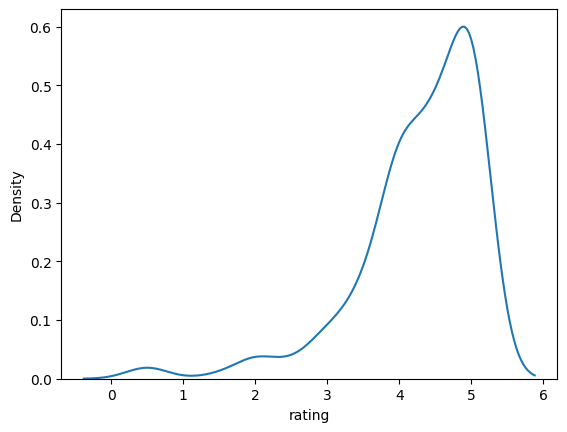

In [125]:
var = df_rat[df_rat['movieId'] == 2959 ]['rating']
sns.kdeplot(var)

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [132]:
ratings = df_rat.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings.columns = ['movieId', 'rating_count', 'rating_mean']
df_merge = pd.merge(df_mov, ratings, on='movieId', how='inner')
movies = df_merge[df_merge['rating_count'] > 50]
movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


Que 9. Which movie is the most popular based on  average user ratings?

Godfather, The (1972)
Shawshank Redemption, The (1994) ✅
Jumanji (1995)
Wolf of Wall Street, The (2013)

Ans :- Shawshank Redemption, The (1994)

In [148]:
movies['rating_mean'].max()

4.429022082018927

In [149]:
movies[movies['rating_mean'] == 4.429022082018927]

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


Que 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.
    
Pulp Fiction (1994) ✅
Bad Boys (1995)
Silence of the Lambs, The (1991) ✅
Matrix, The (1999) ✅

In [161]:
movies.sort_values(by='rating_count').tail()

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134


Que 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

Deadpool (2016)
Terminator 2: Judgment Day (1991)
X-Men: The Last Stand (2006)
Jurassic Park (1993) ✅

Ans:- Jurassic Park (1993)

In [242]:
import numpy as np

In [243]:
l = []
for i in movies.genres.str.split("|"):
    for j in [i]:
        if "Sci-Fi" in j:
            l.append("Sci-Fi")
            
        #elif 'Sci-Fi' not in j:
        else:
            l.append(np.nan)

In [244]:
len(l)

436

In [245]:
l

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 'Sci-Fi',
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 'Sci-Fi',
 nan,
 nan,
 nan,
 'Sci-Fi',
 nan,
 nan,
 'Sci-Fi',
 'Sci-Fi',
 nan,
 nan,
 'S

In [246]:
movies['Sci-Fi'] = l

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3068\3072805356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Sci-Fi'] = l


In [251]:
movies[movies['Sci-Fi'] == 'Sci-Fi'].sort_values(by='rating_count').tail(3)

,movieId,title,genres,rating_count,rating_mean,Sci-Fi
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000,Sci-Fi
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,Sci-Fi
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,Sci-Fi


🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [256]:
scrap = pd.merge(movies, df_li, how='inner')

In [257]:
scrap

,movieId,title,genres,rating_count,rating_mean,Sci-Fi,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,NaN,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,NaN,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,NaN,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,NaN,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,NaN,114319,11860.0
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,NaN,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,NaN,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi,2015381,118340.0


https://www.imdb.com/title/tt0114709

Que 12. Mention the movieId of the movie which has the highest IMDB rating


In [283]:
import requests
import numpy as np
from bs4 import BeautifulSoup

ll = []
id = str(scrap['imdbId'].values)
n_zeroes = 7 - len(id)
new_id = "0"*n_zeroes + id
URL = f"https://www.imdb.com/title/tt{new_id}/"
request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                  'Accept-Encoding': 'gzip, deflate, br'}
response = requests.get(URL, headers=request_header)
soup = BeautifulSoup(response.text)

#imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
#return imdb_rating.text if imdb_rating else np.nan
#imdb_rating.text if imdb_rating else np.nan

 #   imdb_rating = soup.find('FILL_IN_THE_BLANK', class_='sc-bde20123-1 cMEQkK')
#imdb_rating.text if imdb_rating else np.nan

imdb_rating = soup.find('span', attrs={'class_' : 'sc-bde20123-1 cMEQkK'})





[None]

[None]

In [290]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(imdbId)
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    response = requests.get(URL)
    soup = BeautifulSoup(response.text)
    #imdb_rating = soup.find('span', class_ = 'sc-bde20123-1 cMEQkK')
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

scrap['imdbId1'] = scrap.imdbId.apply(scrapper)

In [292]:
scrap

,movieId,title,genres,rating_count,rating_mean,Sci-Fi,imdbId,tmdbId,imdbId1
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,NaN,114709,862.0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,NaN,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,NaN,113228,15602.0,NaN
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,NaN,113277,949.0,NaN
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,NaN,114319,11860.0,NaN
...,...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,NaN,993846,106646.0,NaN
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,NaN,2278388,120467.0,NaN
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi,2015381,118340.0,NaN


In [295]:
%%time

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class_' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

scrap['imdbId1'] = scrap.imdbId.apply(scrapper)

CPU times: total: 8min 22s
Wall time: 19min 25s


In [306]:
scrap

,movieId,title,genres,rating_count,rating_mean,Sci-Fi,imdbId,tmdbId,imdbId1
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,NaN,114709,862.0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,NaN,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,NaN,113228,15602.0,NaN
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,NaN,113277,949.0,NaN
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,NaN,114319,11860.0,NaN
...,...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,NaN,993846,106646.0,NaN
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,NaN,2278388,120467.0,NaN
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,Sci-Fi,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,Sci-Fi,2015381,118340.0,NaN
